In [1]:
!pip install numpy pandas matplotlib statsmodels scikit-learn

  Using cached numpy-2.2.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached statsmodels-0.14.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-macosx_10_13_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metad

# Data Analytics and Machine Learning Basics

### Descriptive statistics

This is a warm-up to make sure everyone is on the same page.

Descriptive statistics helps us summarize data or describe their characteristics.
This includes measures like mean, variance / standard deviation, mode, median, minimum, maximum, etc.

### Measures of central tendency
Tell us about the center of the distribution, the average, or expected value.

#### Mean / average
$$\overline{x} = \frac{\sum_{i=1}^{N}{x_i}}{N}$$

#### Median
$[\frac{N+1}{2}]^{th}$ element in the ordered list, if odd number of values

Average of $[\frac{N}{2}]^{th}$ and $[\frac{N}{2}+1]^{th}$ element in the ordered list, if even number of values

#### Mode
The most occuring value.

### Measures of spread
Tells us how much large of a spread the underying distribution has / how far the values are from the average.

#### Variance and  standard deviation
$$Var(x) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}$$

$$\sigma(x) = \sqrt{Var(x)}$$

### Other
We can also calculate minimum, maximum or quantiles.

On an ordered list:

minimum -> first element

maximum -> last element

quantile/percentile -> $[N \cdot Q\%]^{th}$ element, median special case of quantile/percentile -> 50th percentile

range -> $max(x) - min(x)$

### Exercise

Let's try this in practice using Python!

We will use numpy, a library for fast math computation in python

In [4]:
import numpy as np

x = np.array([1,3,4,7,5,9,9,20])

print("Measures of central tendency:")
print("_"*50)
print(f"Mean of x: {np.mean(x)}")
print(f"Median of x: {np.median(x)}")
_, counts = np.unique(x, return_counts=True)
max_idx = np.argmax(counts)
mode = x[max_idx]
print(f"Mode of x: {mode}")

print("\nMeasures of spread:")
print("_"*50)
print(f"Variance of x: {np.var(x)}")
print(f"Standard deviation of x: {np.std(x)}")
print(f"std(x) == sqrt(var(x)): {np.std(x) == np.sqrt(np.var(x))}")

print("\nOther:")
print("_"*50)
print(f"Minimum of x: {np.min(x)}")
print(f"Maximum of x: {np.max(x)}")
print(f"Range of x: {np.max(x) - np.min(x)}")
print(f"50th percentile / median: {np.quantile(x, 0.5)}")
print(f"95th percentile: {np.quantile(x, 0.95)}")

Measures of central tendency:
__________________________________________________
Mean of x: 7.25
Median of x: 6.0
Mode of x: 9

Measures of spread:
__________________________________________________
Variance of x: 30.1875
Standard deviation of x: 5.494315243958978
std(x) == sqrt(var(x)): True

Other:
__________________________________________________
Minimum of x: 1
Maximum of x: 20
Range of x: 19
50th percentile / median: 6.0
95th percentile: 16.149999999999995


### Your turn!

Try to adjust x in such a way that you get:
mean(x)=5,
std(x)=2.

Or at least close to it.

Here is a simple example, but it can be achieved in infinite ways.

In [3]:
x = [1,5,5,5,5,5,5,9]
print(np.mean(x))
print(np.std(x))

5.0
2.0


### Statistical measures do not always provide the whole picture!
#### Anscombe's quartet
Same mean, variance, correlation and linear regression line.
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/425px-Anscombe%27s_quartet_3.svg.png "Anscombe's quartet")

## Data frames and visualizaton

We just showed that the descriptive statistics is not always enough.
We will now focus on loading larger datasets and try to visualize them.
For this we will use popular libraries called Pandas and Matplotlib.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can load a dataset of CO2 measurements. Some additional data cleaning is necessary.

In [6]:
df = pd.read_csv("sebastian-co2.csv", skiprows=1, names=["timestamp", "co2"], header=0)

In [7]:
df.head()

,timestamp,co2
0,2023-10-16 14:30:50,966
1,2023-10-16 14:32:57,963
2,2023-10-16 14:35:04,975
3,2023-10-16 14:37:12,974
4,2023-10-16 14:39:19,973


We can replace all of the numpy descriptive statistics with a simple describe() method of the dataframe.

In [8]:
df.describe()

,co2
count,90727.000000
mean,830.729386
std,278.975063
min,332.000000
25%,610.000000
50%,812.000000
75%,986.000000
max,2565.000000


We can try to visualize the data

<Axes: >

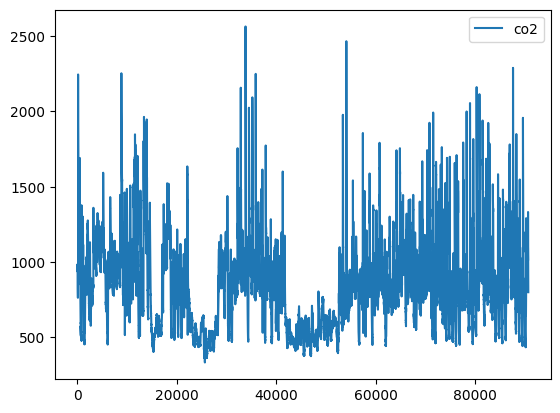

In [9]:
df.plot()

We can see that the timestamps were not parsed correctly. We find that they are stored as strings.

In [10]:
df["timestamp"]

0        2023-10-16 14:30:50
1        2023-10-16 14:32:57
2        2023-10-16 14:35:04
3        2023-10-16 14:37:12
4        2023-10-16 14:39:19
                ...         
90722    2024-03-01 10:16:40
90723    2024-03-01 10:18:47
90724    2024-03-01 10:20:54
90725    2024-03-01 10:23:01
90726    2024-03-01 10:25:08
Name: timestamp, Length: 90727, dtype: object

We can convert them to timestamps and set the timestamp as the index of the dataframe. Now we find that we can produce a timeseries plot.

In [11]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [12]:
df = df.set_index("timestamp")
df.sort_index(inplace = True)

<Axes: xlabel='timestamp'>

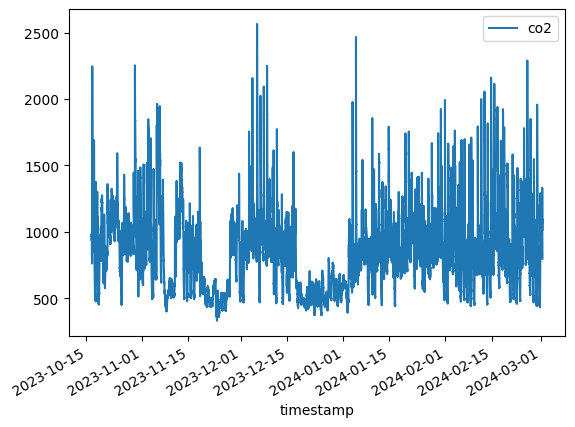

In [13]:
df.plot()

### Digging deeper

We can see that the measuremets were collected from 16th of October to 1st of March at ~2minute intervals

In [13]:
print(f"Start of measurements: {df.index.min()}")
print(f"End of measurements: {df.index.max()}")

Start of measurements: 2023-10-16 14:30:50
End of measurements: 2024-03-01 10:25:08


In [14]:
df.head()

,co2
timestamp,
2023-10-16 14:30:50,966
2023-10-16 14:32:57,963
2023-10-16 14:35:04,975
2023-10-16 14:37:12,974
2023-10-16 14:39:19,973


<Axes: xlabel='timestamp'>

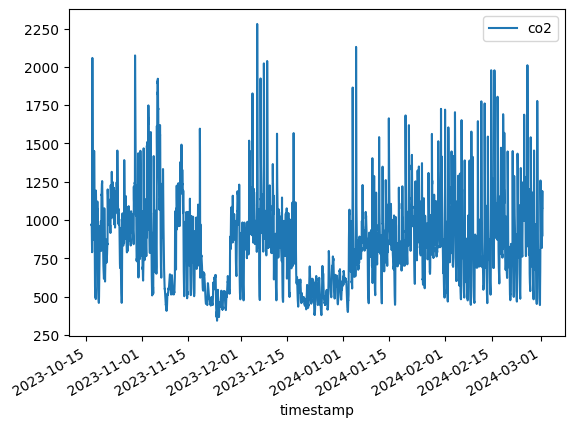

In [15]:
daily_df = df.rolling("1H").mean()
daily_df.plot()

<Axes: xlabel='timestamp'>

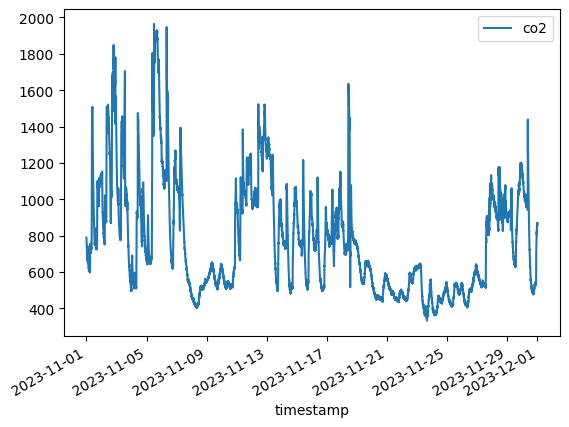

In [16]:
november_df = df.loc["2023-11-01":"2023-11-30"]
november_df.plot()

### Exercise

Try to play around with some other frequencies and data ranges. What insights can you find? You can also try resample(), which works simlarly to rolling.

<Axes: xlabel='timestamp'>

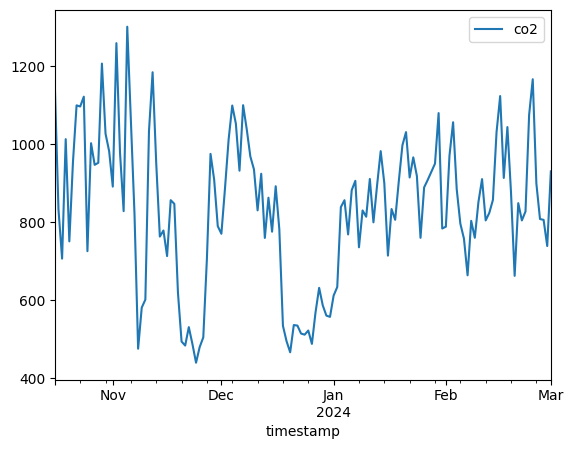

In [17]:
df.resample("1D").mean().plot()

## Other types of visualizations

In [18]:
x = np.random.randint(0, 100, size=100)
y = np.random.randint(0, 100, size=100)

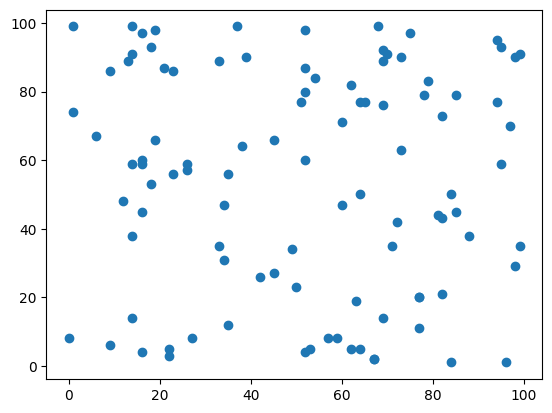

In [19]:
plt.scatter(x, y)

(array([3., 1., 2., 7., 9., 5., 3., 0., 6., 3., 1., 2., 3., 7., 2., 5., 6.,
        7., 4., 5., 4., 4., 1., 4., 6.]),
 array([ 0.  ,  3.96,  7.92, 11.88, 15.84, 19.8 , 23.76, 27.72, 31.68,
        35.64, 39.6 , 43.56, 47.52, 51.48, 55.44, 59.4 , 63.36, 67.32,
        71.28, 75.24, 79.2 , 83.16, 87.12, 91.08, 95.04, 99.  ]),
 <BarContainer object of 25 artists>)

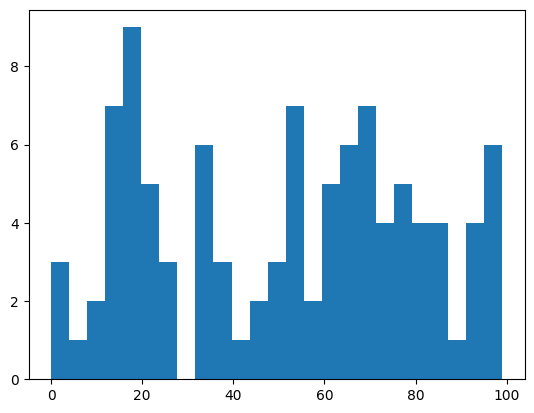

In [20]:
plt.hist(x, bins=25)

(array([19662., 19666., 19670., 19674., 19678., 19682., 19686., 19690.,
        19692.]),
 [Text(19662.0, 0, '2023-11-01'),
  Text(19666.0, 0, '2023-11-05'),
  Text(19670.0, 0, '2023-11-09'),
  Text(19674.0, 0, '2023-11-13'),
  Text(19678.0, 0, '2023-11-17'),
  Text(19682.0, 0, '2023-11-21'),
  Text(19686.0, 0, '2023-11-25'),
  Text(19690.0, 0, '2023-11-29'),
  Text(19692.0, 0, '2023-12-01')])

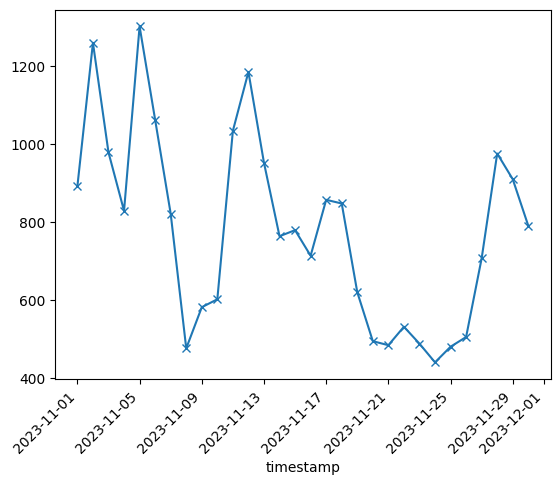

In [21]:
x = november_df.resample("1D").mean().index
y = november_df.resample("1D").mean()["co2"]

plt.plot(x,y, marker="x")
plt.xlabel("timestamp")
plt.xticks(rotation=45, ha='right')

Can you replicate one of the pandas line charts using matplotlib?

# Coffee Break!



## Let's log in to Grafana and try this out on your data?

## Timeseries analysis

### Seasonality
Timseries data can have seasonality - some events might be repeating at same time (like Sebastian making coffee in the morning).

<Axes: xlabel='timestamp'>

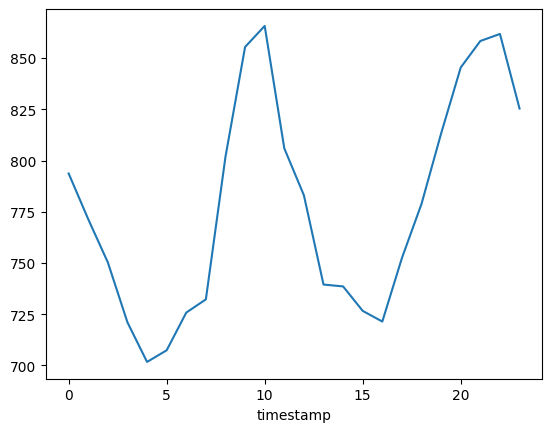

In [22]:
november_df["co2"].groupby(lambda index: index.hour).mean().plot()

### Detrending data
Some timeseries can have an overall trend (increasing/decreasing over time). We can remove this trend in order to see seasonality without it

In [23]:
trend = november_df["co2"].rolling("7D").mean()
detrended = (november_df["co2"] - trend).to_frame()

<Axes: xlabel='timestamp'>

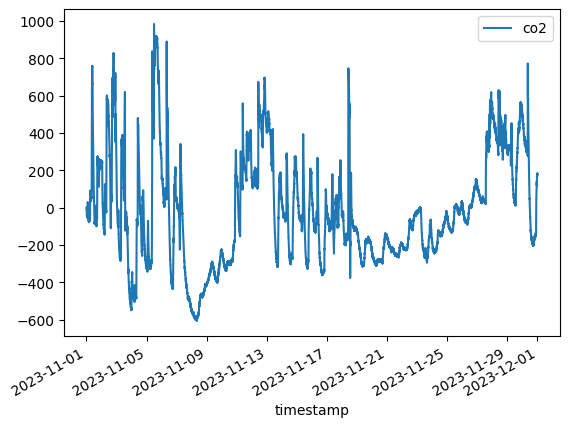

In [24]:
detrended.plot()

<Axes: xlabel='timestamp'>

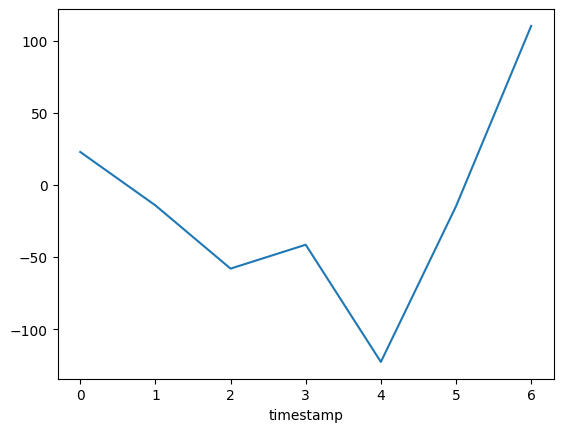

In [25]:
detrended["co2"].groupby(lambda index: index.dayofweek).mean().plot()

## Exercise

Can you spot other seasonality patterns, for example at a weekly or daily occurance. What happens during weekends? Can you spot differences between the seasonality before and after detrending?

### All-in-one solution
Decomposition into trend and seasonality can be achieved through statsmodels package. You need to play around with the period to achieve good results.

In [26]:
print(f"Total number of days in the dataset: {len(set(df.index.date))}")

Total number of days in the dataset: 138


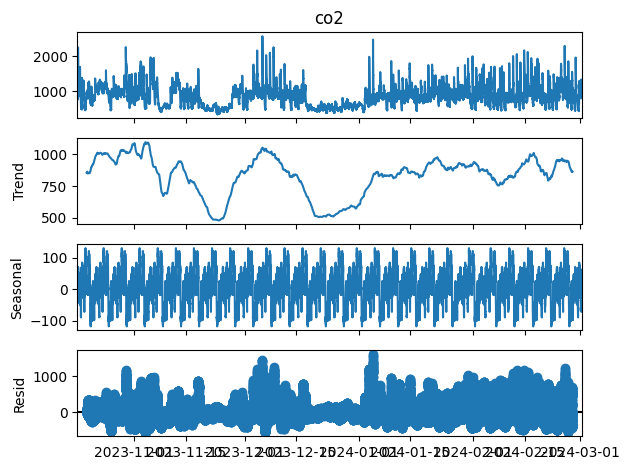

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df["co2"], period=138*24).plot() 
plt.show()

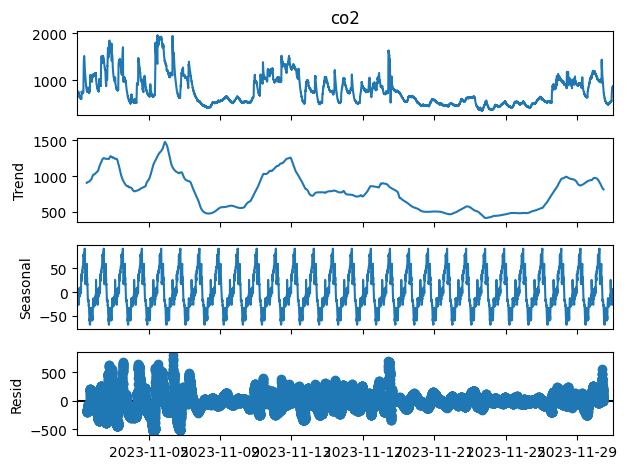

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(november_df["co2"], period=30*24).plot() 
plt.show()

## Anomaly detection

<Axes: xlabel='timestamp'>

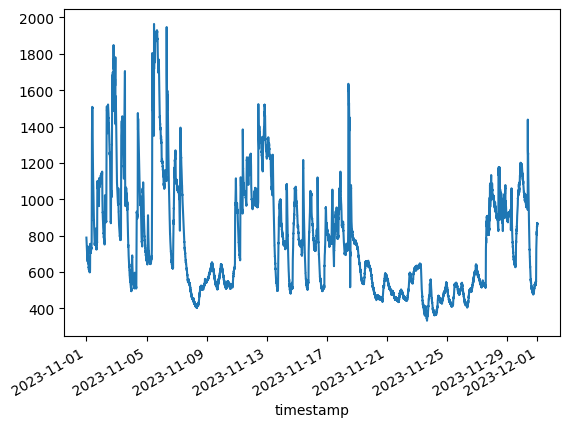

In [29]:
anomaly_df = november_df.copy()
anomaly_df["co2"].plot()

In [30]:
anomaly_df["co2"].iloc[1010] = 10000
anomaly_df["co2"].iloc[3333] = 0
anomaly_df["co2"].iloc[4876] = 4444

<Axes: xlabel='timestamp'>

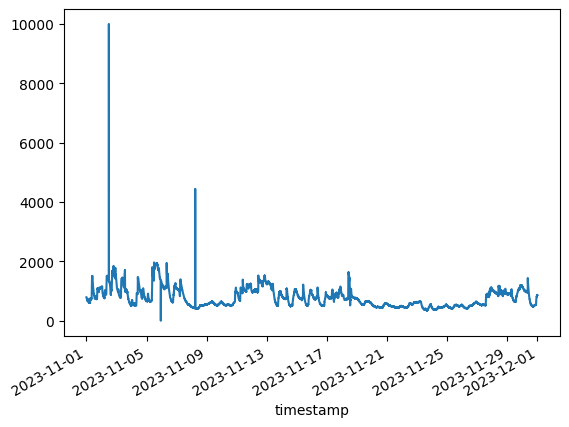

In [31]:
anomaly_df["co2"].plot()

### IQR-based method 

In [32]:
median = anomaly_df["co2"].rolling("1D").median()
q1 = anomaly_df["co2"].rolling("1D").agg(lambda x: x.quantile(0.25))
q3 = anomaly_df["co2"].rolling("1D").agg(lambda x: x.quantile(0.75))
iqr = q3 - q1

<Axes: xlabel='timestamp'>

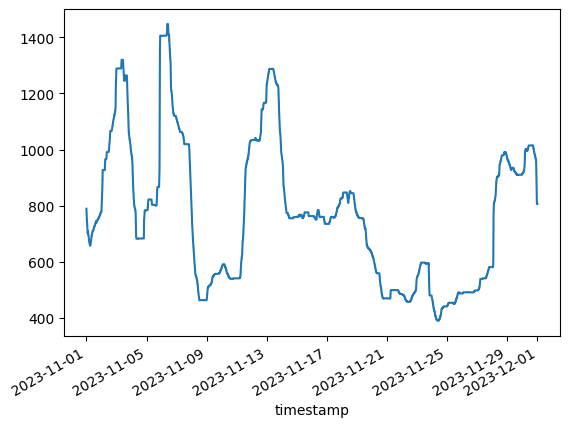

In [33]:
median.plot()

<Axes: xlabel='timestamp'>

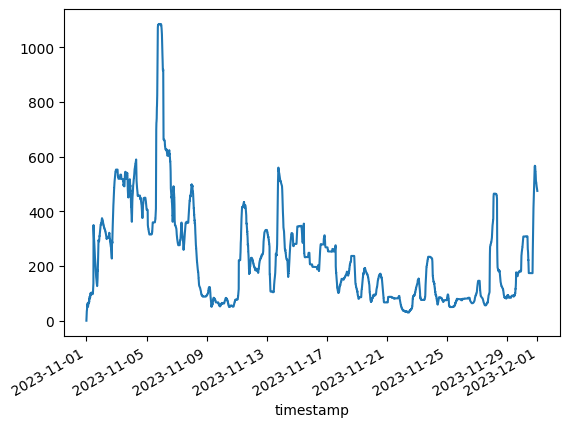

In [34]:
iqr.plot()

<Axes: xlabel='timestamp'>

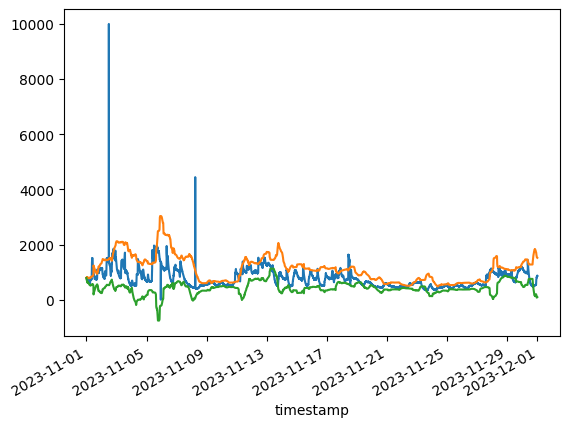

In [35]:
anomaly_df["co2"].plot()
(median + 1.5 * iqr).plot()
(median - 1.5 * iqr).plot()

Try to play around with the rolling average window and the IRQ multiplier. What effects do they have? What works well in our case?

### Median Absolute Deviation (MAD)

In [36]:
median = anomaly_df["co2"].rolling("1D").median()
diff = anomaly_df["co2"] - median
diff = diff.abs()
mad = np.median(diff)

<Axes: xlabel='timestamp'>

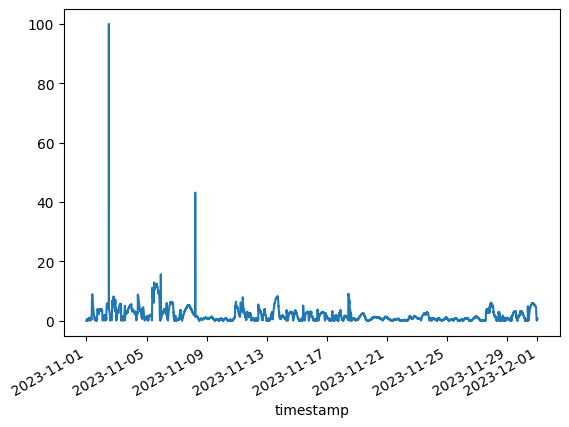

In [37]:
z_score = diff / mad
z_score.plot()

Now you can set a threashold and cut any number above it.
Does the window size you used in the previous example improve this solution too?

## Machine learning exercise

### Classification of iris dataset (based on petals)

In [76]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression

data = load_iris() 

X = data.data
y = data.target
names = data.target_names

In [77]:
X, y = shuffle(X, y)

In [78]:
X.shape[1]

4

In [79]:
X_train = X[:120]
X_test = X[120:]
y_train = y[:120]
y_test = y[120:]

In [80]:
clf = LogisticRegression().fit(X_train, y_train)

/Users/roba/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
clf.score(X_train, y_train)

0.9666666666666667

In [82]:
clf.score(X_test, y_test)

1.0

In [83]:
preds = clf.predict(X_test)

In [84]:
preds

array([1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 0, 0, 0, 2, 0, 2])

Our classifier works wonderfully (100% accuracy!).

Now try to go to scikit-learn website and try to use one of the other classifiers presented previously.

Do they perform similarly?

Do you need all of the features? What happens if you try this with only two? This will also help you to visualize what is happening.

### Regression on diabetes dataset (based on sex, age, bmi, etc.)

In [47]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

In [48]:
X, y = shuffle(X, y)

In [49]:
X.shape[0]

442

In [66]:
X_train = X[:350]
X_test = X[350:]
y_train = y[:350]
y_test = y[350:]

In [67]:
reg = LinearRegression().fit(X_train, y_train)

In [68]:
reg.score(X_train, y_train)

0.5007571850657974

In [69]:
reg.score(X_test, y_test)

0.5621076957386846

Is a straight line a good fit? Try to increase the degree using PolynomialFeatures in scikit learn.

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)

reg = LinearRegression().fit(X_train, y_train)

In [71]:
reg.score(X_train, y_train)

0.8769504582783867

In [72]:
X_test = poly.fit_transform(X_test)

In [73]:
reg.score(X_test, y_test)

-4.986069218101458

### Clustering
Try to run k-means clustering on the iris dataset.
Try reducing the problem to only sepal length and width. Visualize the clusters.

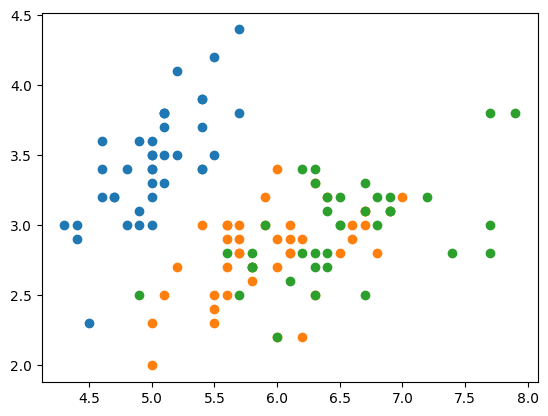

In [91]:
for label in [0,1,2]:
    mask = y_train == label
    plt.scatter(X_train[mask,0], X_train[mask,1])

Do you need all four features? Is there another unsupervised learning algorithm that might work better?

### Outlier detection

Try to run ML-based outlier detection on the outlier_df. Does it work better?
https://scikit-learn.org/stable/modules/outlier_detection.html